## summary statistics of the dataset

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '2022_04_22_hour_heartbeat_merged.csv'
df = pd.read_csv ( file_path )

# Display summary statistics
df.describe()

,Beats,Id,Intensity,Steps
count,6252.000000,6.252000e+03,6246.000000,6246.000000
mean,73.845170,5.638328e+09,16.101185,431.416747
std,14.799422,1.864900e+09,25.190960,811.960176
min,46.000000,2.022484e+09,0.000000,0.000000
25%,63.000000,4.558610e+09,0.000000,0.000000
50%,71.000000,5.577150e+09,7.000000,130.000000
75%,81.000000,6.962181e+09,22.000000,542.000000
max,167.000000,8.877689e+09,180.000000,10554.000000


## first look

In [2]:
df.head()

,time,Beats,Id,Intensity,Steps
0,2016-04-12 01,83,2022484408,0.0,0.0
1,2016-04-12 02,78,2022484408,0.0,0.0
2,2016-04-12 03,66,2022484408,0.0,0.0
3,2016-04-12 04,68,2022484408,0.0,0.0
4,2016-04-12 05,68,2022484408,0.0,0.0


## data visualization

In [3]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Checking the type of 'time' column to confirm conversion
df.dtypes


time         datetime64[ns]
Beats                 int64
Id                    int64
Intensity           float64
Steps               float64
dtype: object

In [4]:
# Group by Id and date (without time) and then calculate the required values
daily_data = df.groupby([df['Id'], df['time'].dt.date]).agg(
    Total_Intensity=('Intensity', 'sum'),
    Total_Steps=('Steps', 'sum')
).reset_index()

# Rename 'time' to 'Date' after aggregation to avoid confusion
daily_data.rename(columns={'time': 'Date'}, inplace=True)

daily_data.head()


,Id,Date,Total_Intensity,Total_Steps
0,2022484408,2016-04-12,381.0,11875.0
1,2022484408,2016-04-13,431.0,12024.0
2,2022484408,2016-04-14,359.0,10690.0
3,2022484408,2016-04-15,381.0,11034.0
4,2022484408,2016-04-16,296.0,10100.0


In [5]:
# get patient
# Get the list of unique patient IDs
patient_ids = daily_data['Id'].unique()

# Plot data for the first patient as an example
first_patient_id = patient_ids[3]
first_patient_data = daily_data[daily_data['Id'] == first_patient_id]



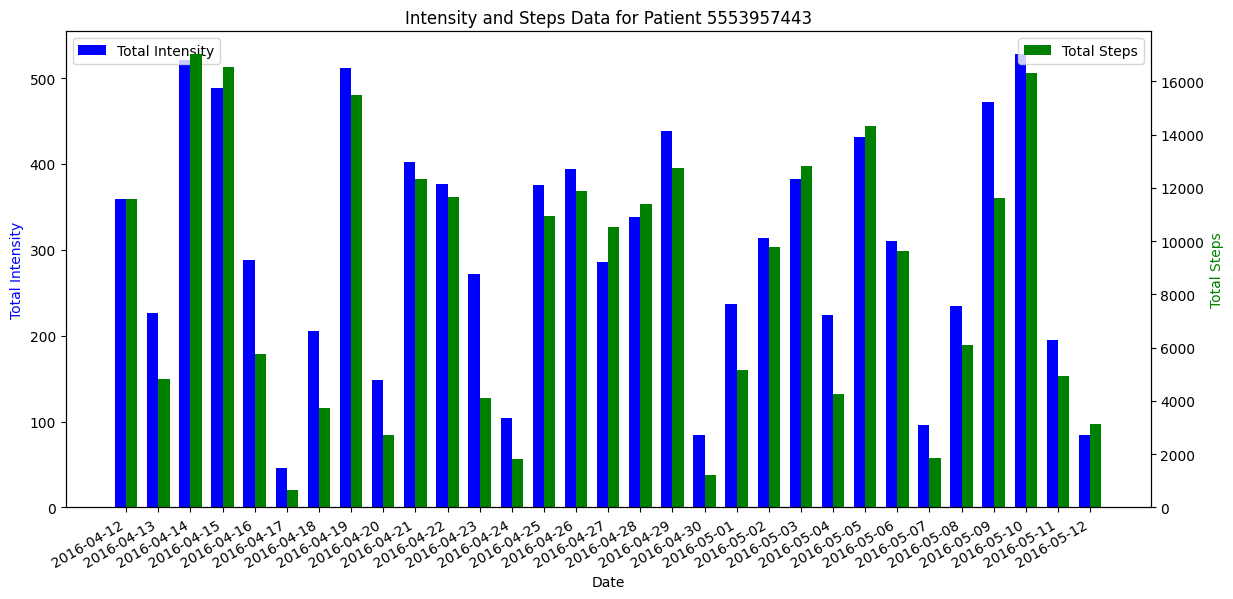

In [6]:
import matplotlib.pyplot as plt

# Function to plot data for a single patient with total intensity and total steps side by side
def plot_patient_data_with_steps(patient_id, patient_data):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Create an array with the positions of the bars along the x-axis
    dates = patient_data['Date']
    bar_width = 0.35  
    indices = range(len(dates))  

    # Bar chart for total intensity
    ax1.bar(indices, patient_data['Total_Intensity'], bar_width, color='b', label='Total Intensity')

    # Bar chart for total steps on the same x-axis with a different color and shifted position
    ax2 = ax1.twinx()
    ax2.bar([i + bar_width for i in indices], patient_data['Total_Steps'], bar_width, color='g', label='Total Steps')

    # Set the labels and titles
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Intensity', color='b')
    ax2.set_ylabel('Total Steps', color='g')
    ax1.set_title(f'Intensity and Steps Data for Patient {patient_id}')
    
    # Set the x-axis tick labels to the dates and adjust their position to be in the center of the two bars
    ax1.set_xticks([i + bar_width / 2 for i in indices])
    ax1.set_xticklabels(dates)

    # Adding legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Formatting the date on the x-axis for better readability
    fig.autofmt_xdate()

    plt.show()

# Plot data for the first patient as an example with the updated function
plot_patient_data_with_steps(first_patient_id, first_patient_data)



In [7]:
# Add 'Week' and 'Weekday' columns to the dataframe
df['Week'] = df['time'].dt.isocalendar().week
df['Weekday'] = df['time'].dt.day_name()

# Since 'Weekday' is a categorical type with strings, we need to order it properly for the plots
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



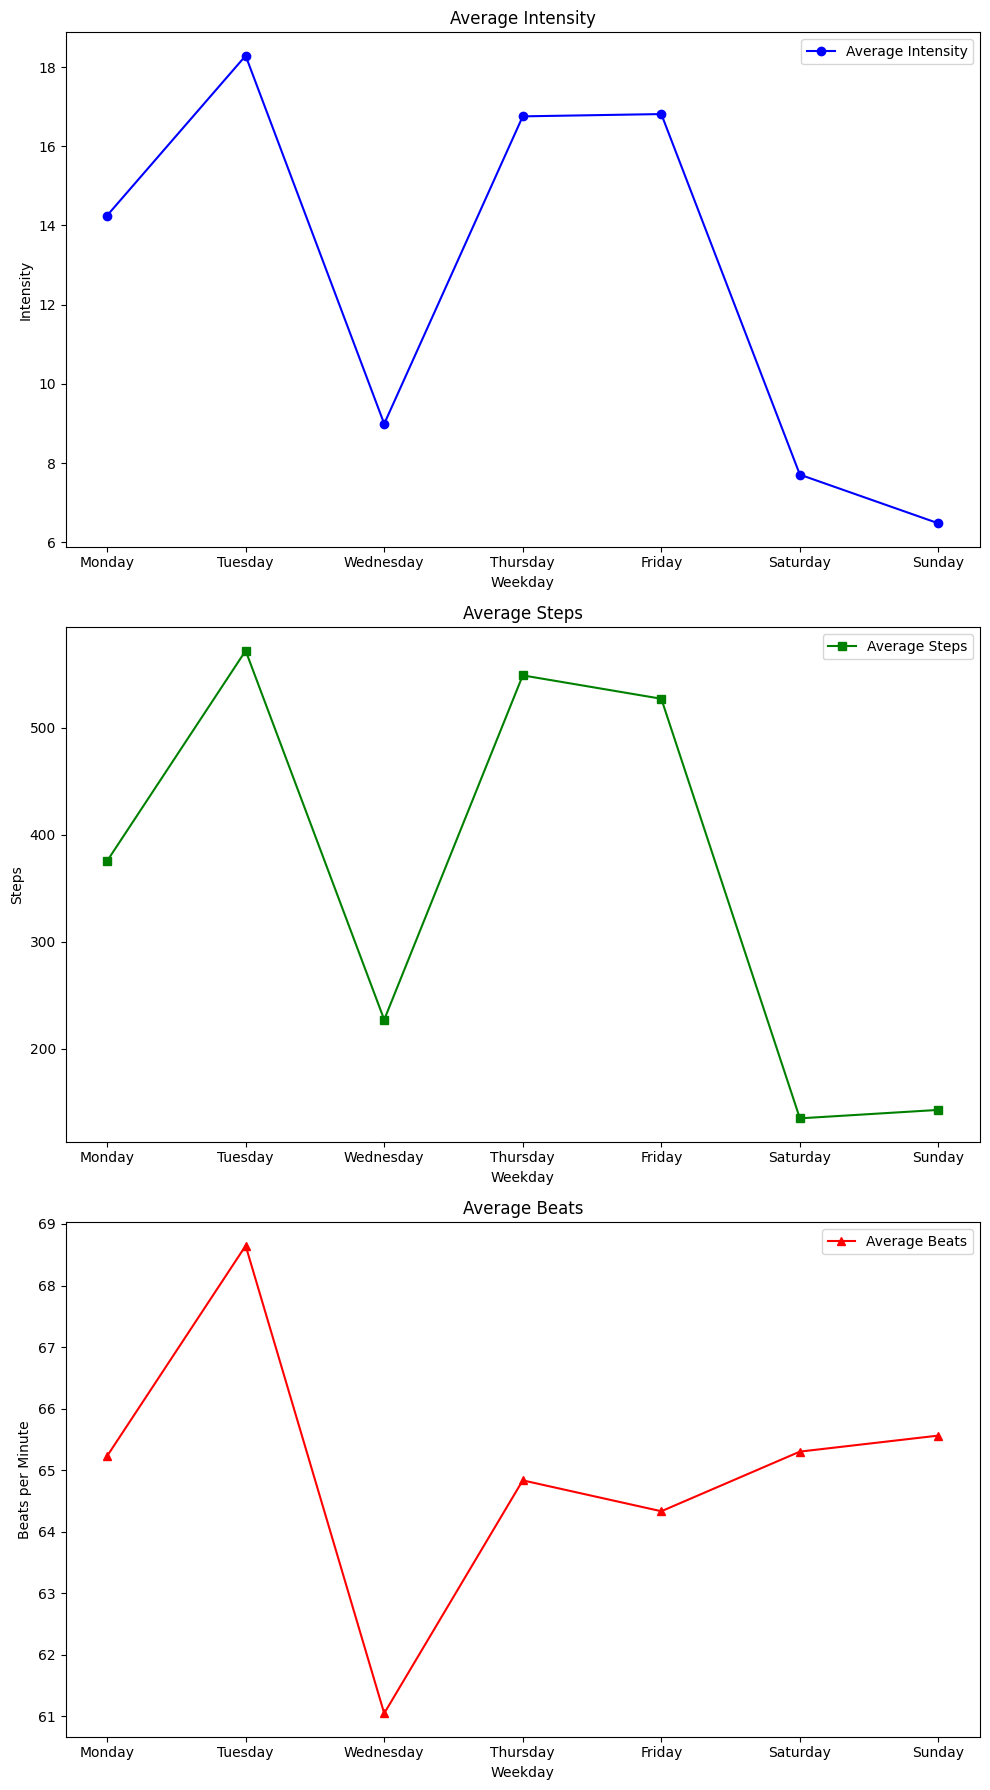

In [8]:
# Group by Id and Weekday, then calculate the required averages
average_week_data = df.groupby(['Id', 'Weekday']).agg(
    Average_Intensity=('Intensity', 'mean'),
    Average_Steps=('Steps', 'mean'),
    Average_Beats=('Beats', 'mean')
).reset_index()

# Sort the dataframe by 'Weekday' to ensure the plot has the weekdays in order
average_week_data['Weekday'] = pd.Categorical(average_week_data['Weekday'], categories=weekdays_order, ordered=True)
average_week_data.sort_values(by=['Weekday'], inplace=True)


# Function to plot a combined average week for a single patient with three metrics
def plot_combined_average_week(patient_id, patient_average_week_data):
    # Filter data for the specific patient
    patient_data = patient_average_week_data[patient_average_week_data['Id'] == patient_id]

    # Check if there is data for the specified patient
    if patient_data.empty:
        print(f"No data available for patient {patient_id}.")
        return

    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 18))

    # Plot Average Intensity
    ax1.plot(patient_data['Weekday'], patient_data['Average_Intensity'], label='Average Intensity', marker='o', color='blue')
    ax1.set_title('Average Intensity')
    ax1.set_xlabel('Weekday')
    ax1.set_ylabel('Intensity')
    ax1.legend()

    # Plot Average Steps
    ax2.plot(patient_data['Weekday'], patient_data['Average_Steps'], label='Average Steps', marker='s', color='green')
    ax2.set_title('Average Steps')
    ax2.set_xlabel('Weekday')
    ax2.set_ylabel('Steps')
    ax2.legend()

    # Plot Average Beats
    ax3.plot(patient_data['Weekday'], patient_data['Average_Beats'], label='Average Beats', marker='^', color='red')
    ax3.set_title('Average Beats')
    ax3.set_xlabel('Weekday')
    ax3.set_ylabel('Beats per Minute')
    ax3.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the combined plot
    plt.show()

# Plot the combined average week data for the first patient
plot_combined_average_week(first_patient_id, average_week_data)



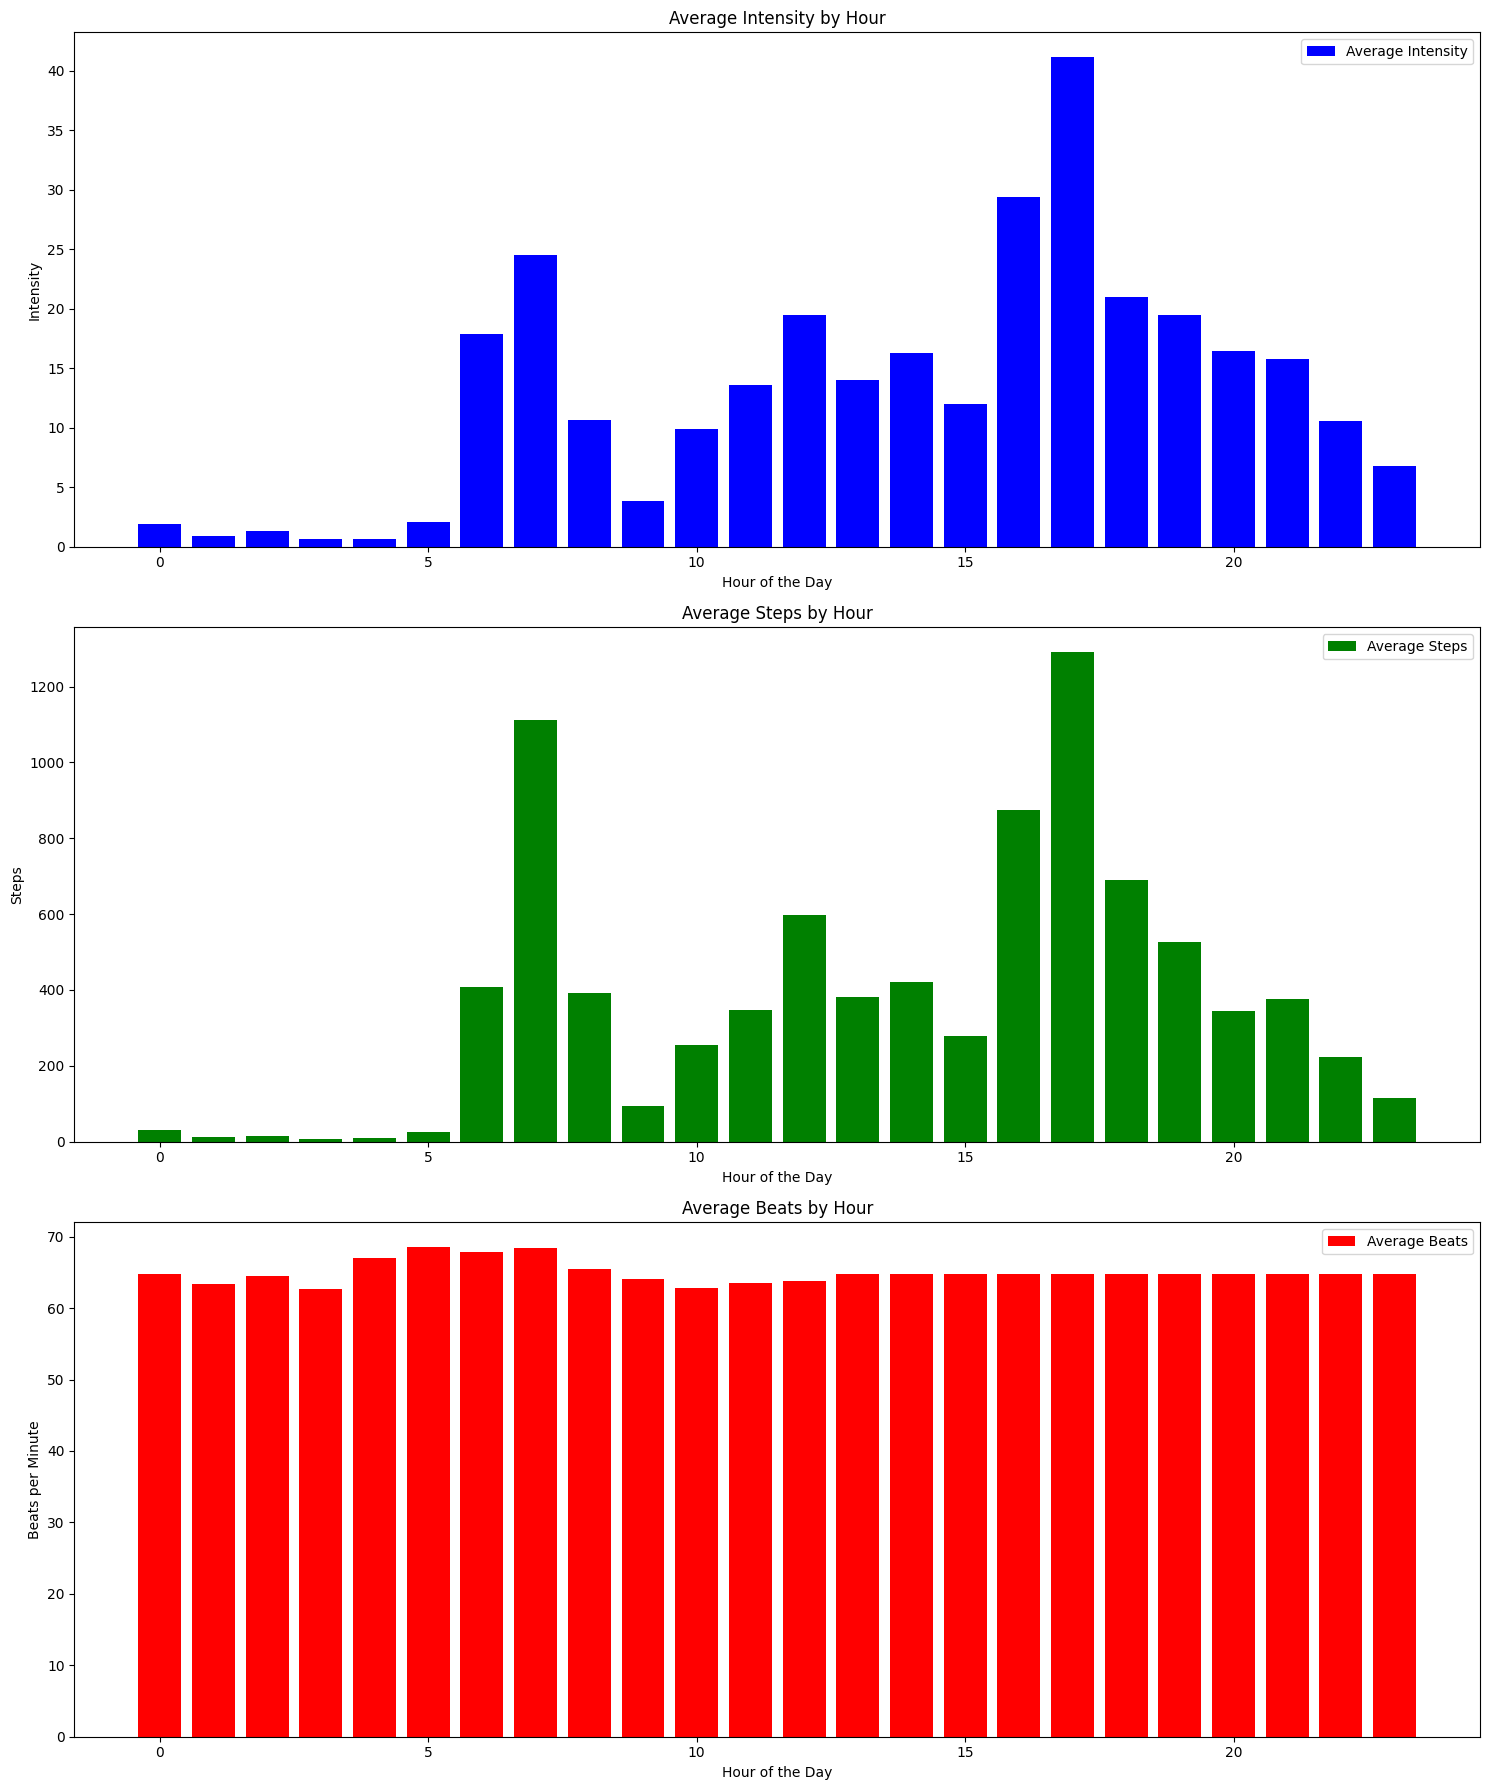

In [9]:
# Extract hour from the timestamp
df['Hour'] = df['time'].dt.hour

# Group by Id and Hour, then calculate the required averages for an average day by hour
average_hourly_data = df.groupby(['Id', 'Hour']).agg(
    Average_Intensity=('Intensity', 'mean'),
    Average_Steps=('Steps', 'mean'),
    Average_Beats=('Beats', 'mean')
).reset_index()

# Function to plot average hourly data for a single patient with three metrics
def plot_average_hourly_day(patient_id, patient_average_hourly_data):
    # Filter data for the specific patient
    patient_data = patient_average_hourly_data[patient_average_hourly_data['Id'] == patient_id]

    # Check if there is data for the specified patient
    if patient_data.empty:
        print(f"No data available for patient {patient_id}.")
        return

    # Creating a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

    # Plotting bars for average intensity, steps, and beats for each hour
    ax1.bar(patient_data['Hour'], patient_data['Average_Intensity'], color='blue', label='Average Intensity')
    ax1.set_title('Average Intensity by Hour')
    ax1.set_xlabel('Hour of the Day')
    ax1.set_ylabel('Intensity')
    ax1.legend()

    ax2.bar(patient_data['Hour'], patient_data['Average_Steps'], color='green', label='Average Steps')
    ax2.set_title('Average Steps by Hour')
    ax2.set_xlabel('Hour of the Day')
    ax2.set_ylabel('Steps')
    ax2.legend()

    ax3.bar(patient_data['Hour'], patient_data['Average_Beats'], color='red', label='Average Beats')
    ax3.set_title('Average Beats by Hour')
    ax3.set_xlabel('Hour of the Day')
    ax3.set_ylabel('Beats per Minute')
    ax3.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot the average hourly data for the first patient
plot_average_hourly_day(first_patient_id, average_hourly_data)


## data preprocessing

# handle missing values

In [10]:
# show missing values
# Load the dataset again
file_path = '2022_04_22_hour_heartbeat_merged.csv'
df = pd.read_csv ( file_path )
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

               time  Beats          Id  Intensity  Steps
2901  2016-05-12 10     78  5553957443        NaN    NaN
2902  2016-05-12 11     78  5553957443        NaN    NaN
2903  2016-05-12 12     56  5553957443        NaN    NaN
3611  2016-05-11 12     56  5577150313        NaN    NaN
4199  2016-05-09 12     83  6117666160        NaN    NaN
4931  2016-05-12 12     67  6962181067        NaN    NaN


### look as well at time ranges of the study, what data is missing?
patient didnt start at the same time,most common from 2016-04-12 to 2016-05-12
data time range for some patient inconsitent to the others

In [11]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Calculate the number of data points for each patient
data_points_per_patient = df.groupby('Id').size()

# time range for the dataset
min_time = df['time'].min()
max_time = df['time'].max()

# Generate a complete time series from start to end with hourly frequency
full_time_series = pd.date_range(start=min_time, end=max_time, freq='H')

# Identify missing time points for each patient
missing_time_points_per_patient = {}

# find time range for each patient
date_ranges_per_patient = {}


for patient_id in df['Id'].unique():
    patient_data = df[df['Id'] == patient_id]
    patient_time_series = patient_data['time']
    missing_time_points = full_time_series.difference(patient_time_series)
    missing_time_points_per_patient[patient_id] = missing_time_points

    # finding begin and end
    start_date = patient_data['time'].min()
    end_date = patient_data['time'].max()
    date_ranges_per_patient[patient_id] = (start_date, end_date)


data_points_per_patient, missing_time_points_per_patient

# Let's make the output more readable by summarizing the missing data information for each patient

# This function will summarize missing time points for a patient
def summarize_missing_time_points(missing_times):
    if missing_times.empty:
        return "No missing time points."
    else:
        # Calculate the number of missing days by finding the unique dates
        missing_days = missing_times.normalize().unique()
        # Summarize the missing hours per day
        missing_summary = {str(day.date()): missing_times[missing_times.normalize() == day].size 
                           for day in missing_days}
        return missing_summary

# Apply the summarize function to each patient's missing time points
readable_missing_summary = {patient: summarize_missing_time_points(missing_times) 
                            for patient, missing_times in missing_time_points_per_patient.items()}

# Now, let's print the data points per patient and the readable summary of missing time points in a more formatted way
for patient_id, summary in readable_missing_summary.items():
    print(f"Patient {patient_id}:")
    print(f"Total Data Points: {data_points_per_patient[patient_id]}")
    
    # Retrieve the start and end dates for this patient
    start_date, end_date = date_ranges_per_patient[patient_id]
    print(f"Data Start Date: {start_date}")
    print(f"Data End Date: {end_date}")
    
    print("Missing Time Points Summary:")
    if isinstance(summary, str):
        print(summary)
    else:
        for day, count in summary.items():
            print(f"  {day}: {count} missing hours")
    print("\n")  # Add a newline for better separation


Patient 2022484408:
Total Data Points: 732
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 4388161847:
Total Data Points: 708
Data Start Date: 2016-04-13 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
  2016-04-12: 23 missing hours
  2016-04-13: 1 missing hours


Patient 4558609924:
Total Data Points: 732
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 5553957443:
Total Data Points: 732
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 5577150313:
Total Data Points: 708
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-11 12:00:00
Missing Time Points Summary:
  2016-05-11: 11 missing hours
  2016-05-12: 13 missing hours


Patient 6117666160:
Total Data Points: 588
Data Start Date: 2016-04-15 01:0

### but consistent time series data points within the range

In [12]:
# Initialize the dictionary to store date ranges for each patient
date_ranges_per_patient = {}
missing_time_points_per_patient = {}

# Calculate the number of data points for each patient
data_points_per_patient = df.groupby('Id').size()

for patient_id in df['Id'].unique():
    patient_data = df[df['Id'] == patient_id]
    
    # Find the start and end times for this patient
    start_date = patient_data['time'].min()
    end_date = patient_data['time'].max()
    
    # Store the start and end times in the dictionary
    date_ranges_per_patient[patient_id] = (start_date, end_date)
    
    # Generate the full time series for this patient only
    patient_full_time_series = pd.date_range(start=start_date, end=end_date, freq='H')
    
    # Identify the missing time points for this patient
    missing_time_points = patient_full_time_series.difference(patient_data['time'])
    missing_time_points_per_patient[patient_id] = missing_time_points

# data readable format
for patient_id in df['Id'].unique():
    print(f"Patient {patient_id}:")
    print(f"Total Data Points: {data_points_per_patient[patient_id]}")
    
    # Retrieve the start and end dates for this patient
    start_date, end_date = date_ranges_per_patient[patient_id]
    print(f"Data Start Date: {start_date}")
    print(f"Data End Date: {end_date}")
    
    # Summarize the missing time points for this patient
    missing_times = missing_time_points_per_patient[patient_id]
    summary = summarize_missing_time_points(missing_times)
    
    print("Missing Time Points Summary:")
    if isinstance(summary, str):
        print(summary)
    else:
        for day, count in summary.items():
            print(f"  {day}: {count} missing hours")
    print("\n")  # Add a newline for better separation


Patient 2022484408:
Total Data Points: 732
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 4388161847:
Total Data Points: 708
Data Start Date: 2016-04-13 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 4558609924:
Total Data Points: 732
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 5553957443:
Total Data Points: 732
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-12 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 5577150313:
Total Data Points: 708
Data Start Date: 2016-04-12 01:00:00
Data End Date: 2016-05-11 12:00:00
Missing Time Points Summary:
No missing time points.


Patient 6117666160:
Total Data Points: 588
Data Start Date: 2016-04-15 01:00:00
Data End Date: 2016-05-09 12:00:00
Missing Time Points Summary:
No mis

In [13]:
# shows that just start and end data points are missing, in the time series itself for each patient are no data missing

In [14]:
# Fill the missing values with zeros for the specific patient 5553957443 in the full dataset
df.loc[df['Id'] == 5553957443, ['Intensity', 'Steps']] = df.loc[df['Id'] == 5553957443, ['Intensity', 'Steps']].fillna(0)

# Verify by checking for any remaining missing values for patient 5553957443
remaining_missing_values_patient = df[df['Id'] == 5553957443].isnull().sum()

remaining_missing_values_patient


time         0
Beats        0
Id           0
Intensity    0
Steps        0
dtype: int64

In [15]:
# Checking for missing values in the dataset
missing_values_by_patient = df[df.isnull().any(axis=1)]

# Applying the previous valid observation to fill the remaining missing values for each patient with missing data
for patient_id, patient_data in missing_values_by_patient.groupby('Id'):
    # Extract the patient's DataFrame
    patient_df = df[df['Id'] == patient_id]
    missing_indices = patient_data.index
    # Apply the previous valid observation forward to fill the missing values
    df.loc[patient_df.index, ['Intensity', 'Steps']] = patient_df[['Intensity', 'Steps']].fillna(method='ffill')

# Check if all missing values have now been filled
all_missing_values_filled = df.isnull().sum()
all_missing_values_filled


time         0
Beats        0
Id           0
Intensity    0
Steps        0
dtype: int64

In [16]:
df.describe()

,Beats,Id,Intensity,Steps
count,6252.000000,6.252000e+03,6252.000000,6252.000000
mean,73.845170,5.638328e+09,16.101887,431.423864
std,14.799422,1.864900e+09,25.184801,811.707852
min,46.000000,2.022484e+09,0.000000,0.000000
25%,63.000000,4.558610e+09,0.000000,0.000000
50%,71.000000,5.577150e+09,7.000000,130.000000
75%,81.000000,6.962181e+09,22.000000,543.000000
max,167.000000,8.877689e+09,180.000000,10554.000000


# scaling data

In [19]:
from sklearn . preprocessing import MinMaxScaler

# Calculate the index to split on
split_index = int(len(df) * 0.7)

# Split the data into training and testing sets
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Define the columns we want to scale
columns_to_scale = ['Beats', 'Intensity', 'Steps']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data aand transform it
train_data_scaled = scaler.fit_transform(train_data[columns_to_scale])

# Use the same scaler to transform the testing data
test_data_scaled = scaler.transform(test_data[columns_to_scale])

train_data_scaled_df = pd.DataFrame(train_data_scaled, index=train_data.index, columns=columns_to_scale)
test_data_scaled_df = pd.DataFrame(test_data_scaled, index=test_data.index, columns=columns_to_scale)
train_data_scaled_df.head(), test_data_scaled_df.head()



(      Beats  Intensity  Steps
 0  0.456790        0.0    0.0
 1  0.395062        0.0    0.0
 2  0.246914        0.0    0.0
 3  0.271605        0.0    0.0
 4  0.271605        0.0    0.0,
          Beats  Intensity     Steps
 4376  0.444444   0.255556  0.234160
 4377  0.555556   0.627778  0.702996
 4378  0.333333   0.044444  0.016185
 4379  0.271605   0.011111  0.007748
 4380  0.283951   0.066667  0.044421)